In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
import time
import six
import sys
sys.modules['sklearn.externals.six']=six
import matplotlib.pyplot as plt
import mlrose

In [4]:
#Data loading
strdata=np.loadtxt('energy.csv', delimiter=',', dtype=str)
strdata=strdata[1:,:]
data=strdata.astype('double')
input=data[:,0:-2]
output1=data[:,-2:-1]
output1[output1<=22.3] = 0 #small heating load
output1[output1> 22.3] = 1 #large heating load

X_train, X_test, y_train, y_test = train_test_split (input, output1)


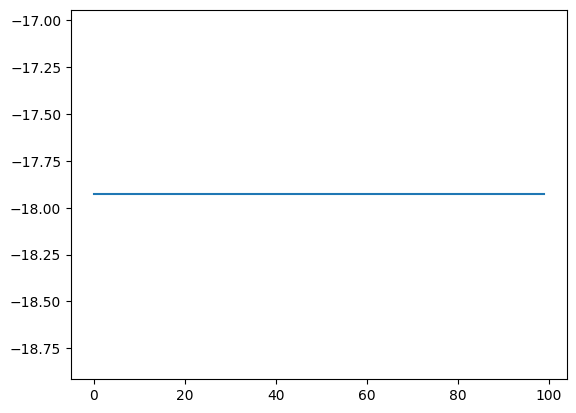

for random_hill_climb the time to train was 1.3999109268188477.
for random_hill_climb the training accuracy was 0.4809027777777778.
for random_hill_climb the test accuracy was 0.4739583333333333.
for random_hill_climb the loss function was 17.929397954357505.


In [13]:
from sklearn.metrics import accuracy_score

for alg in ['random_hill_climb']: #, 'simulated_annealing', 'genetic_alg']:
    model=mlrose.NeuralNetwork(algorithm=alg, activation= 'tanh', restarts=10, curve=True)#, early_stopping=True, max_attempts=10)
    time0=time.time()
    model.fit(X_train, y_train)
    time1=time.time()
    train_predic=model.predict(X_train)
    test_predic=model.predict(X_test)

    timetotrain=time1-time0
    train_acc=accuracy_score(y_train, train_predic)
    test_acc= accuracy_score(y_test, test_predic)
    loss=model.loss
    plt.plot(model.fitness_curve)
    plt.show()
    

    print("for " + alg + " the time to train was " + str(timetotrain) + "." )
    print("for " + alg + " the training accuracy was " + str(train_acc) + "." )
    print("for " + alg + " the test accuracy was " + str(test_acc) + "." )
    print("for " + alg + " the loss function was " + str(loss) + "." )



In [7]:
model.fitted_weights
model.loss
model.fitness_curve

array([-0.59964542, -0.59964542, -0.59964542, -0.59964542, -0.59964542,
       -0.59964542, -0.59964542, -0.59964542, -0.59964542, -0.59964542,
       -0.59964542])